![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

# TFM - Clustering

# *1. Librerías*

In [115]:
# Principales librerias
import pandas as pd
import numpy as np

# Visuzalizaciones
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import hdbscan


# Configuración de las visualizaciones
pd.set_option('display.max_info_columns', 110 )
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', None)




# *2. Carga de datos*

In [3]:
# Cargar el dataset para utilizar en clustering
df = pd.read_csv("./data/dfClustering1.csv", sep=';', index_col=False, low_memory=False)

In [4]:
# Cargar el dataset para utilizar en clustering
df_original = pd.read_csv("./data/dfClustering1.csv", sep=';', index_col=False, low_memory=False)

# *3. Exploración de datos*

In [5]:
print(f"El DataFrame 'df' tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame 'df' tiene 9863 filas y 72 columnas.


In [6]:
df.head(2)

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
0,150.00,Carabanchel,11,Vista Alegre,114,0,Piso,2,0.00,2.00,3,3,1,1,0,1,30_50,0,Desconocido,0,0,1,0,0,0,1,28025,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,47727,505,36,3,16,0,0,289,15239,2.66,28825,139,57,1332,483,298,854,455,1560282,0,0,0,1,1,410000,236116.67,221407.95,2795.07,305,6,25.00,2,4.00,3422,84
1,95.00,Salamanca,4,Castellana,46,0,Piso,2,0.00,2.00,2,2,0,0,0,0,mas_50,0,lujo,0,0,1,0,0,0,1,28006,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,16919,189,3,6,18,0,1,186,38751,2.28,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1149000,2342136.80,1752995.20,11417.75,205,4,23.75,1,2.00,7681,259


In [7]:
df.columns

Index(['m2_constr', 'distrito', 'cod_distrito', 'barrio', 'cod_barrio',
       'letra_ce', 'tipologia', 'estado', 'amueblado', 'planta', 'dormitorios',
       'banos', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad',
       'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior',
       'piscina', 'porton_electrico', 'videoportero', 'armarios',
       'codigo_postal', 'tipo_suelo', 'certificado_energetico',
       'puerta_seguridad', 'orientacion_este', 'orientacion_oeste',
       'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte',
       'letra_emisiones', 'num_personas', 'total_transacciones',
       'viv_nuevas_transacciones', 'lineas_metro', 'salidas_metro',
       'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
       'renta_bruta_media_por_persona', 'tamano_medio_del_hogar', 'tam_hogar',
       'hog_con_10', 'hog_con_15_y_más', 'comercio_serviciosminoristas',
       'hosteleria_restauracion', 'salud_bienestar_educacion',
  

In [8]:
# Verificar valores nulos por columna
valores_nulos = df.isnull().sum().sort_values(ascending=False)

print(f"El DataFrame 'df' tiene los siguientes valores nulos por columna:\n{valores_nulos}.")

El DataFrame 'df' tiene los siguientes valores nulos por columna:
m2_constr                        0
distrito                         0
cod_distrito                     0
barrio                           0
cod_barrio                       0
letra_ce                         0
tipologia                        0
estado                           0
amueblado                        0
planta                           0
dormitorios                      0
banos                            0
balcon                           0
terraza                          0
trastero                         0
ascensor                         0
antiguedad                       0
jardin                           0
tipo_inmueble                    0
cancha_tenis                     0
chimenea                         0
exterior                         0
piscina                          0
porton_electrico                 0
videoportero                     0
armarios                         0
codigo_postal           

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
m2_constr,9863.00,NaN,NaN,NaN,138.75,152.78,10.00,68.00,98.00,150.00,4574.00
distrito,9863,21,Centro,1711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_distrito,9863.00,NaN,NaN,NaN,7.82,5.75,1.00,4.00,6.00,12.00,21.00
barrio,9863,131,Goya,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cod_barrio,9863.00,NaN,NaN,NaN,81.89,57.61,11.00,41.00,66.00,124.00,215.00
letra_ce,9863.00,NaN,NaN,NaN,0.65,1.41,0.00,0.00,0.00,0.00,7.00
tipologia,9863,6,Piso,8609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado,9863.00,NaN,NaN,NaN,1.39,1.53,0.00,0.00,1.00,2.00,5.00
amueblado,9863.00,NaN,NaN,NaN,0.10,0.30,0.00,0.00,0.00,0.00,1.00
planta,9863.00,NaN,NaN,NaN,2.58,2.20,-1.00,1.00,2.00,3.00,27.00


## 3.1. Tipos de datos

In [10]:
# Identificar los tipos de datos en el dataset
tipos_de_datos = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      55
float64     9
object      8
Name: count, dtype: int64.


In [11]:
# Obtener lista de columnas que son de tipo object
columnas_object = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar la lista de columnas
print(columnas_object)

['distrito', 'barrio', 'tipologia', 'antiguedad', 'tipo_inmueble', 'tipo_suelo', 'aire', 'grupo_cocina']


In [12]:
# Columnas pendientes de hacer Label Encoding
columnas_object_df = df.select_dtypes(include=['object'])
columnas_object_df.head()

,distrito,barrio,tipologia,antiguedad,tipo_inmueble,tipo_suelo,aire,grupo_cocina
0,Carabanchel,Vista Alegre,Piso,30_50,Desconocido,Desconocido,Normal,Desconocido
1,Salamanca,Castellana,Piso,mas_50,lujo,Desconocido,Normal,Desconocido
2,Salamanca,Goya,Piso,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido
3,Moncloa-Aravaca,Ciudad Universitaria,Chalet,Desconocido,lujo,Desconocido,Desconocido,Desconocido
4,Vicálvaro,El Cañaveral,Piso,Desconocido,Desconocido,Desconocido,Desconocido,Desconocido


In [13]:
# Obtener variables que son de tipo float
columnas_float = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float.head()

,m2_constr,amueblado,planta,tamano_medio_del_hogar,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,m2_por_hab,atrib
0,150.00,0.00,2.00,2.66,236116.67,221407.95,2795.07,25.00,4.00
1,95.00,0.00,2.00,2.28,2342136.80,1752995.20,11417.75,23.75,2.00
2,108.00,0.00,8.00,2.28,1454144.60,1752995.20,10005.31,21.60,4.00
3,767.00,0.00,0.00,2.58,1444970.90,3110450.80,4488.38,69.73,3.00
4,128.00,0.00,3.00,2.69,435815.80,285074.25,3000.72,25.60,4.00


In [14]:
# Revisar si amueblado es una variable numérica continua o es booleana/categórica
amueblado_unique = df['amueblado'].unique()
print(amueblado_unique)

[0.  1.  0.1 0.5]


In [15]:
# Obtener variables que son de tipo int
columnas_int = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int.head()

,cod_distrito,cod_barrio,letra_ce,estado,dormitorios,banos,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,total_estaciones,habitaciones,atrib_lujo,serv_barrio,cod_barrio_frecuency
0,11,114,0,2,3,3,1,1,0,1,0,0,0,1,0,0,0,1,28025,0,0,0,0,0,0,0,47727,505,36,3,16,0,0,289,15239,28825,139,57,1332,483,298,854,455,1560282,0,0,0,1,1,410000,305,6,2,3422,84
1,4,46,0,2,2,2,0,0,0,0,0,0,0,1,0,0,0,1,28006,0,0,0,0,0,0,0,16919,189,3,6,18,0,1,186,38751,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1149000,205,4,1,7681,259
2,4,42,0,2,3,2,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,29477,478,4,6,18,0,1,186,38751,24741,11,30,2470,1051,928,2315,917,333527,0,0,0,1,5,1175000,205,5,1,7681,338
3,9,93,0,5,6,5,0,0,0,1,0,0,0,1,0,0,0,1,28040,0,0,0,0,0,0,0,16364,109,8,6,14,1,3,351,36592,14738,26,59,532,200,235,347,207,19901426,0,0,0,1,5,4500000,369,11,1,1521,66
4,19,194,0,3,3,2,0,0,1,1,0,0,0,2,0,0,0,1,28032,0,0,0,0,1,0,0,13054,1085,1068,1,4,0,1,138,18214,7582,23,14,180,72,72,52,92,1063815,0,0,0,1,3,318900,143,5,2,468,38


In [16]:
# Transformar variables int a tipo float ya que son numéricas continuas
columnas_a_float = ['dormitorios', 'banos', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
                    'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
                    'renta_bruta_media_por_persona', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más',
                    'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion',
                    'servicios_profesionales', 'cultura_entretenimiento', 'm2_areasverdes', 'num_garajes', 'target',
                    'total_estaciones', 'habitaciones', 'serv_barrio', 'cod_barrio_frecuency']
df[columnas_a_float] = df[columnas_a_float].astype('float64')

# Obtener variables que son de tipo int
columnas_int_final = df.select_dtypes(include=['int'])

# Mostrar variables
columnas_int_final.head()

,cod_distrito,cod_barrio,letra_ce,estado,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group,atrib_lujo
0,11,114,0,2,1,1,0,1,0,0,0,1,0,0,0,1,28025,0,0,0,0,0,0,0,0,0,0,1,2
1,4,46,0,2,0,0,0,0,0,0,0,1,0,0,0,1,28006,0,0,0,0,0,0,0,0,0,0,5,1
2,4,42,0,2,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,0,0,0,5,1
3,9,93,0,5,0,0,0,1,0,0,0,1,0,0,0,1,28040,0,0,0,0,0,0,0,0,0,0,5,1
4,19,194,0,3,0,0,1,1,0,0,0,2,0,0,0,1,28032,0,0,0,0,1,0,0,0,0,0,3,2


In [17]:
# DATASET ORIGINAL TAMBIÉN: Transformar variables int a tipo float ya que son numéricas continuas
columnas_a_float_dforiginal = ['dormitorios', 'banos', 'num_personas', 'total_transacciones', 'viv_nuevas_transacciones',
                    'lineas_metro', 'salidas_metro', 'estaciones_metroligero', 'estaciones_cercanias', 'estacion_bus_urbano',
                    'renta_bruta_media_por_persona', 'tam_hogar', 'hog_con_10', 'hog_con_15_y_más',
                    'comercio_serviciosminoristas', 'hosteleria_restauracion', 'salud_bienestar_educacion',
                    'servicios_profesionales', 'cultura_entretenimiento', 'm2_areasverdes', 'num_garajes', 'target',
                    'total_estaciones', 'habitaciones', 'serv_barrio', 'cod_barrio_frecuency']
df_original[columnas_a_float_dforiginal] = df_original[columnas_a_float_dforiginal].astype('float64')

# Obtener variables que son de tipo int
columnas_int_final_dforiginal = df_original.select_dtypes(include=['int'])

# Mostrar variables
columnas_int_final_dforiginal.head()

,cod_distrito,cod_barrio,letra_ce,estado,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,ins_comunitaria,energia,eficiencia_carpinteria,cod_barrio_group,atrib_lujo
0,11,114,0,2,1,1,0,1,0,0,0,1,0,0,0,1,28025,0,0,0,0,0,0,0,0,0,0,1,2
1,4,46,0,2,0,0,0,0,0,0,0,1,0,0,0,1,28006,0,0,0,0,0,0,0,0,0,0,5,1
2,4,42,0,2,0,0,0,1,0,0,0,2,0,0,0,1,28001,0,0,0,0,0,0,0,0,0,0,5,1
3,9,93,0,5,0,0,0,1,0,0,0,1,0,0,0,1,28040,0,0,0,0,0,0,0,0,0,0,5,1
4,19,194,0,3,0,0,1,1,0,0,0,2,0,0,0,1,28032,0,0,0,0,1,0,0,0,0,0,3,2


In [18]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_2 = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_2}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
float64    35
int64      29
object      8
Name: count, dtype: int64.


In [19]:
# DATASET ORIGINAL TAMBIÉN: Identificar los tipos de datos en el dataset
tipos_de_datos_dforiginal = df_original.dtypes.value_counts()

print(f"El DataFrame 'df_original' tiene los siguientes tipos de datos:\n{tipos_de_datos_dforiginal}.")

El DataFrame 'df_original' tiene los siguientes tipos de datos:
float64    35
int64      29
object      8
Name: count, dtype: int64.


In [20]:
# Obtener variables que son de tipo float
columnas_float_final = df.select_dtypes(include=['float'])

# Mostrar variables
columnas_float_final.head()

,m2_constr,amueblado,planta,dormitorios,banos,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,num_garajes,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib,serv_barrio,cod_barrio_frecuency
0,150.00,0.00,2.00,3.00,3.00,47727.00,505.00,36.00,3.00,16.00,0.00,0.00,289.00,15239.00,2.66,28825.00,139.00,57.00,1332.00,483.00,298.00,854.00,455.00,1560282.00,1.00,410000.00,236116.67,221407.95,2795.07,305.00,6.00,25.00,4.00,3422.00,84.00
1,95.00,0.00,2.00,2.00,2.00,16919.00,189.00,3.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,1.00,1149000.00,2342136.80,1752995.20,11417.75,205.00,4.00,23.75,2.00,7681.00,259.00
2,108.00,0.00,8.00,3.00,2.00,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,1.00,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,4.00,7681.00,338.00
3,767.00,0.00,0.00,6.00,5.00,16364.00,109.00,8.00,6.00,14.00,1.00,3.00,351.00,36592.00,2.58,14738.00,26.00,59.00,532.00,200.00,235.00,347.00,207.00,19901426.00,1.00,4500000.00,1444970.90,3110450.80,4488.38,369.00,11.00,69.73,3.00,1521.00,66.00
4,128.00,0.00,3.00,3.00,2.00,13054.00,1085.00,1068.00,1.00,4.00,0.00,1.00,138.00,18214.00,2.69,7582.00,23.00,14.00,180.00,72.00,72.00,52.00,92.00,1063815.00,1.00,318900.00,435815.80,285074.25,3000.72,143.00,5.00,25.60,4.00,468.00,38.00


In [21]:
# Mostrar el DataFrame para comparación posterior
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
0,150.00,Carabanchel,11,Vista Alegre,114,0,Piso,2,0.00,2.00,3.00,3.00,1,1,0,1,30_50,0,Desconocido,0,0,1,0,0,0,1,28025,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,47727.00,505.00,36.00,3.00,16.00,0.00,0.00,289.00,15239.00,2.66,28825.00,139.00,57.00,1332.00,483.00,298.00,854.00,455.00,1560282.00,0,0,0,1.00,1,410000.00,236116.67,221407.95,2795.07,305.00,6.00,25.00,2,4.00,3422.00,84.00
1,95.00,Salamanca,4,Castellana,46,0,Piso,2,0.00,2.00,2.00,2.00,0,0,0,0,mas_50,0,lujo,0,0,1,0,0,0,1,28006,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,16919.00,189.00,3.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1149000.00,2342136.80,1752995.20,11417.75,205.00,4.00,23.75,1,2.00,7681.00,259.00
2,108.00,Salamanca,4,Goya,42,0,Piso,2,0.00,8.00,3.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28001,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,1,4.00,7681.00,338.00
3,767.00,Moncloa-Aravaca,9,Ciudad Universitaria,93,0,Chalet,5,0.00,0.00,6.00,5.00,0,0,0,1,Desconocido,0,lujo,0,0,1,0,0,0,1,28040,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,16364.00,109.00,8.00,6.00,14.00,1.00,3.00,351.00,36592.00,2.58,14738.00,26.00,59.00,532.00,200.00,235.00,347.00,207.00,19901426.00,0,0,0,1.00,5,4500000.00,1444970.90,3110450.80,4488.38,369.00,11.00,69.73,1,3.00,1521.00,66.00
4,128.00,Vicálvaro,19,El Cañaveral,194,0,Piso,3,0.00,3.00,3.00,2.00,0,0,1,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28032,Desconocido,0,0,0,0,1,Desconocido,Desconocido,0,0,13054.00,1085.00,1068.00,1.00,4.00,0.00,1.00,138.00,18214.00,2.69,7582.00,23.00,14.00,180.00,72.00,72.00,52.00,92.00,1063815.00,0,0,0,1.00,3,318900.00,435815.80,285074.25,3000.72,143.00,5.00,25.60,2,4.00,468.00,38.00


## 3.2. Label Encoding

In [22]:
# Lista de columnas a transformar
cols_int_obj = df.select_dtypes(include=['int', 'object']).columns.tolist()
if 'amueblado' not in cols_int_obj:
    cols_int_obj.append('amueblado')

print(cols_int_obj)

['distrito', 'cod_distrito', 'barrio', 'cod_barrio', 'letra_ce', 'tipologia', 'estado', 'balcon', 'terraza', 'trastero', 'ascensor', 'antiguedad', 'jardin', 'tipo_inmueble', 'cancha_tenis', 'chimenea', 'exterior', 'piscina', 'porton_electrico', 'videoportero', 'armarios', 'codigo_postal', 'tipo_suelo', 'certificado_energetico', 'puerta_seguridad', 'orientacion_este', 'orientacion_oeste', 'orientacion_sur', 'aire', 'grupo_cocina', 'orientacion_norte', 'letra_emisiones', 'ins_comunitaria', 'energia', 'eficiencia_carpinteria', 'cod_barrio_group', 'atrib_lujo', 'amueblado']


In [23]:
# Crear el objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a cada columna
for col in cols_int_obj:
    df[col] = label_encoder.fit_transform(df[col])

# Mostrar el DataFrame transformado
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
0,150.00,2,10,129,68,0,5,2,0,2.00,3.00,3.00,1,1,0,1,1,0,0,0,0,1,0,0,0,0,23,1,0,0,0,0,0,2,2,0,0,47727.00,505.00,36.00,3.00,16.00,0.00,0.00,289.00,15239.00,2.66,28825.00,139.00,57.00,1332.00,483.00,298.00,854.00,455.00,1560282.00,0,0,0,1.00,0,410000.00,236116.67,221407.95,2795.07,305.00,6.00,25.00,2,4.00,3422.00,84.00
1,95.00,14,3,28,24,0,5,2,0,2.00,2.00,2.00,0,0,0,0,4,0,2,0,0,1,0,0,0,0,5,1,0,0,0,0,0,2,2,0,0,16919.00,189.00,3.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,4,1149000.00,2342136.80,1752995.20,11417.75,205.00,4.00,23.75,1,2.00,7681.00,259.00
2,108.00,14,3,56,20,0,5,2,0,8.00,3.00,2.00,0,0,0,1,3,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,4,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,1,4.00,7681.00,338.00
3,767.00,10,8,33,53,0,2,5,0,0.00,6.00,5.00,0,0,0,1,3,0,2,0,0,1,0,0,0,0,37,1,0,0,0,0,0,0,2,0,0,16364.00,109.00,8.00,6.00,14.00,1.00,3.00,351.00,36592.00,2.58,14738.00,26.00,59.00,532.00,200.00,235.00,347.00,207.00,19901426.00,0,0,0,1.00,4,4500000.00,1444970.90,3110450.80,4488.38,369.00,11.00,69.73,1,3.00,1521.00,66.00
4,128.00,18,18,43,117,0,5,3,0,3.00,3.00,2.00,0,0,1,1,3,0,0,0,0,2,0,0,0,0,30,1,0,0,0,0,1,0,2,0,0,13054.00,1085.00,1068.00,1.00,4.00,0.00,1.00,138.00,18214.00,2.69,7582.00,23.00,14.00,180.00,72.00,72.00,52.00,92.00,1063815.00,0,0,0,1.00,2,318900.00,435815.80,285074.25,3000.72,143.00,5.00,25.60,2,4.00,468.00,38.00


In [24]:
# Identificar los tipos de datos en el dataset
tipos_de_datos_final = df.dtypes.value_counts()

print(f"El DataFrame 'df' tiene los siguientes tipos de datos:\n{tipos_de_datos_final}.")

El DataFrame 'df' tiene los siguientes tipos de datos:
int64      38
float64    34
Name: count, dtype: int64.


# *4. Reducción de dimensionalidad*

In [25]:
# Identificar variables numéricas continuas (float64) y categóricas/dummies (int64)
variables_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Aplicar StandardScaler
scaler = StandardScaler()
df[variables_numericas] = scaler.fit_transform(df[variables_numericas])

# Mostrar un resumen de los datos escalados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
m2_constr,9863.00,-0.00,1.00,-0.84,-0.46,-0.27,0.07,29.03
distrito,9863.00,0.00,1.00,-1.59,-1.05,-0.16,0.90,1.97
cod_distrito,9863.00,0.00,1.00,-1.19,-0.66,-0.32,0.73,2.29
barrio,9863.00,-0.00,1.00,-1.87,-0.77,-0.10,0.92,1.72
cod_barrio,9863.00,0.00,1.00,-1.24,-0.73,-0.28,0.77,2.24
letra_ce,9863.00,0.00,1.00,-0.46,-0.46,-0.46,-0.46,4.51
tipologia,9863.00,-0.00,1.00,-3.57,0.36,0.36,0.36,0.36
estado,9863.00,-0.00,1.00,-0.91,-0.91,-0.26,0.40,2.36
amueblado,9863.00,-0.00,1.00,-0.34,-0.34,-0.34,-0.34,3.03
planta,9863.00,0.00,1.00,-1.63,-0.72,-0.26,0.19,11.11


In [26]:
# Reducir memoria
def reduce_mem_usage(df, turn_cat=False, silence=True):
    """Itera sobre todo el dataset convirtiendo cada columna en el tipo más adecuado para ahorrar memoria.

    Parameters
    ----------
    df : pd.DataFrame
        Dataframe que se quiere reducir.
    turn_cat : bool, optional
        Transformación de las columnas objeto o string a category, by default False.

    Returns
    -------
    pd.DataFrame
        Dataframe optimizado.
    """

    start_mem = df.memory_usage().sum() / 1024**2  # Memoria inicial

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object and not isinstance(col_type, pd.CategoricalDtype):
            c_min = df[col].min()
            c_max = df[col].max()

            if pd.api.types.is_numeric_dtype(df[col]):
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

                # Conversión de float a int si no hay decimales y no hay NaN
                df[col] = df[col].fillna(0)  # Rellenar NaN antes de verificar si son enteros
                # Check if the column is of type float before applying is_integer
                if df[col].dtype.kind == 'f':
                    if all(df[col].apply(float.is_integer)):
                        df[col] = df[col].astype(np.int64)

        # Conversión de objetos a categoría si turn_cat es True
        if turn_cat and col_type == object:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2  # Memoria final

    if not silence:
        print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
        print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
        
    return df

In [27]:
# Preparar fichero de control antes de hacer clustering
df.reset_index(drop=True, inplace=True)
df = reduce_mem_usage(df, turn_cat=False, silence=False)

Memory usage after optimization is: 2.71 MB
Decreased by 50.0%


In [28]:
# Generar fichero de control antes de hacer clustering
df.to_csv("dfClustering_LISTO.csv", sep = ";", index=False)

# *5. Clustering de viviendas*

## *5.1. MiniBatchKMeans*

### 5.1.1. Generar los Clusters

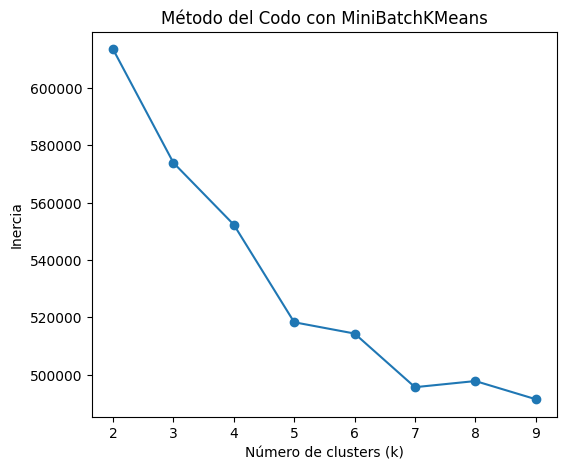

In [29]:
from sklearn.cluster import MiniBatchKMeans

# Definir un rango de valores de k a probar
rango_k = range(2, 10)  # Probamos de 2 a 10 clusters

# Reiniciar la lista de inercias
inercias = []

# Aplicar MiniBatchKMeans en diferentes valores de k
for k in rango_k:
    mini_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256, n_init=10)
    mini_kmeans.fit(df)
    inercias.append(mini_kmeans.inertia_)

# Graficar el método del codo con MiniBatchKMeans
plt.figure(figsize=(6, 5))
plt.plot(rango_k, inercias, marker='o', linestyle='-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo con MiniBatchKMeans')
plt.show()

In [30]:
# Calcular la diferencia de inercias entre cada k para detectar el "codo"
diferencias = np.diff(inercias)

# Encontrar el índice donde la diferencia cambia más bruscamente
k_optimo = rango_k[np.argmin(diferencias) + 1]  # +1 porque np.diff reduce el tamaño en 1

k_optimo

3

In [31]:
# Aplicar MiniBatchKMeans con k=5
kmeans_final = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=256, n_init=10)
df['cluster'] = kmeans_final.fit_predict(df)

# Mostrar el resumen de la asignación de clusters
resumen_clusters = df['cluster'].value_counts().sort_index()

# Visualizar los datos con los clusters asignados
df.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency,cluster
0,0.07,-1.23,0.55,1.70,0.58,-0.46,0.36,0.40,-0.34,-0.26,0.13,0.73,3.33,2.06,-0.39,0.21,-2.21,-0.22,-0.46,-0.02,-0.07,-0.58,-0.16,-0.03,-0.18,-0.19,0.25,-0.35,-0.48,-0.10,-0.25,-0.23,-0.29,1.74,-0.07,-0.18,-0.46,1.40,0.90,-0.06,-0.83,0.06,-0.37,-1.03,0.77,-1.36,1.08,0.65,2.56,1.47,0.18,-0.38,-0.29,-0.11,0.07,0.01,-0.20,-0.36,-0.20,0.49,-1.69,-0.28,-0.95,-1.04,-1.06,0.75,0.46,-0.09,0.77,-0.11,-0.08,-0.43,4
1,-0.29,0.90,-0.66,-1.10,-0.60,-0.46,0.36,0.40,-0.34,-0.26,-0.59,-0.06,-0.30,-0.48,-0.39,-4.83,1.07,-0.22,1.86,-0.02,-0.07,-0.58,-0.16,-0.03,-0.18,-0.19,-1.03,-0.35,-0.48,-0.10,-0.25,-0.23,-0.29,1.74,-0.07,-0.18,-0.46,-0.77,-0.71,-0.39,0.45,0.34,-0.37,-0.40,-0.56,1.20,-0.47,0.06,-1.01,-0.53,1.78,1.10,1.67,1.87,1.67,-0.32,-0.20,-0.36,-0.20,0.49,1.01,0.41,2.13,1.35,1.93,-0.54,-0.37,-0.17,-0.25,-1.28,1.77,1.38,3
2,-0.20,0.90,-0.66,-0.32,-0.71,-0.46,0.36,0.40,-0.34,2.47,0.13,-0.06,-0.30,-0.48,-0.39,0.21,-0.03,-0.22,-0.46,-0.02,-0.07,1.69,-0.16,-0.03,-0.18,-0.19,-1.38,-0.35,-0.48,-0.10,-0.25,-0.23,-0.29,-0.57,-0.07,-0.18,-0.46,0.11,0.76,-0.38,0.45,0.34,-0.37,-0.40,-0.56,1.20,-0.47,0.06,-1.01,-0.53,1.78,1.10,1.67,1.87,1.67,-0.32,-0.20,-0.36,-0.20,0.49,1.01,0.43,0.83,1.35,1.44,-0.54,0.05,-0.30,-0.25,-0.11,1.77,2.19,3
3,4.11,0.19,0.21,-0.96,0.18,-0.46,-2.00,2.36,-0.34,-1.17,2.32,2.30,-0.30,-0.48,-0.39,0.21,-0.03,-0.22,1.86,-0.02,-0.07,-0.58,-0.16,-0.03,-0.18,-0.19,1.24,-0.35,-0.48,-0.10,-0.25,-0.23,-0.29,-0.57,-0.07,-0.18,-0.46,-0.81,-1.12,-0.34,0.45,-0.21,0.51,0.86,1.57,0.97,0.75,-1.38,-0.59,1.62,-0.95,-1.11,-0.48,-0.80,-0.79,4.94,-0.20,-0.36,-0.20,0.49,1.01,3.54,0.82,3.47,-0.47,1.58,2.55,2.63,-0.25,-0.70,-0.90,-0.62,1
4,-0.07,1.62,1.94,-0.68,1.89,-0.46,0.36,1.05,-0.34,0.19,0.13,-0.06,-0.30,-0.48,2.54,0.21,-0.03,-0.22,-0.46,-0.02,-0.07,1.69,-0.16,-0.03,-0.18,-0.19,0.74,-0.35,-0.48,-0.10,-0.25,-0.23,3.44,-0.57,-0.07,-0.18,-0.46,-1.04,3.86,10.23,-1.68,-1.60,-0.37,-0.40,-1.18,-1.04,1.20,-2.41,-0.67,-1.71,-1.45,-1.44,-0.99,-1.20,-1.19,-0.12,-0.20,-0.36,-0.20,0.49,-0.34,-0.36,-0.65,-0.94,-0.99,-1.34,0.05,-0.05,0.77,-0.11,-1.36,-0.91,4


### 5.1.2. Visualización e interpretación
- Análisis de características
- Validación de la calidad de los Clusters
- Aplicación del resultado a la problemática

In [32]:
df.shape

(9863, 73)

In [33]:
df_original.shape

(9863, 72)

In [34]:
# Sumar la columna cluster al 'df_original'
df_final = df_original.join(df[['cluster']])

df_final.shape

(9863, 73)

In [35]:
df_final.head()

,m2_constr,distrito,cod_distrito,barrio,cod_barrio,letra_ce,tipologia,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,antiguedad,jardin,tipo_inmueble,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,tipo_suelo,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,aire,grupo_cocina,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency,cluster
0,150.00,Carabanchel,11,Vista Alegre,114,0,Piso,2,0.00,2.00,3.00,3.00,1,1,0,1,30_50,0,Desconocido,0,0,1,0,0,0,1,28025,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,47727.00,505.00,36.00,3.00,16.00,0.00,0.00,289.00,15239.00,2.66,28825.00,139.00,57.00,1332.00,483.00,298.00,854.00,455.00,1560282.00,0,0,0,1.00,1,410000.00,236116.67,221407.95,2795.07,305.00,6.00,25.00,2,4.00,3422.00,84.00,4
1,95.00,Salamanca,4,Castellana,46,0,Piso,2,0.00,2.00,2.00,2.00,0,0,0,0,mas_50,0,lujo,0,0,1,0,0,0,1,28006,Desconocido,0,0,0,0,0,Normal,Desconocido,0,0,16919.00,189.00,3.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1149000.00,2342136.80,1752995.20,11417.75,205.00,4.00,23.75,1,2.00,7681.00,259.00,3
2,108.00,Salamanca,4,Goya,42,0,Piso,2,0.00,8.00,3.00,2.00,0,0,0,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28001,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,29477.00,478.00,4.00,6.00,18.00,0.00,1.00,186.00,38751.00,2.28,24741.00,11.00,30.00,2470.00,1051.00,928.00,2315.00,917.00,333527.00,0,0,0,1.00,5,1175000.00,1454144.60,1752995.20,10005.31,205.00,5.00,21.60,1,4.00,7681.00,338.00,3
3,767.00,Moncloa-Aravaca,9,Ciudad Universitaria,93,0,Chalet,5,0.00,0.00,6.00,5.00,0,0,0,1,Desconocido,0,lujo,0,0,1,0,0,0,1,28040,Desconocido,0,0,0,0,0,Desconocido,Desconocido,0,0,16364.00,109.00,8.00,6.00,14.00,1.00,3.00,351.00,36592.00,2.58,14738.00,26.00,59.00,532.00,200.00,235.00,347.00,207.00,19901426.00,0,0,0,1.00,5,4500000.00,1444970.90,3110450.80,4488.38,369.00,11.00,69.73,1,3.00,1521.00,66.00,1
4,128.00,Vicálvaro,19,El Cañaveral,194,0,Piso,3,0.00,3.00,3.00,2.00,0,0,1,1,Desconocido,0,Desconocido,0,0,2,0,0,0,1,28032,Desconocido,0,0,0,0,1,Desconocido,Desconocido,0,0,13054.00,1085.00,1068.00,1.00,4.00,0.00,1.00,138.00,18214.00,2.69,7582.00,23.00,14.00,180.00,72.00,72.00,52.00,92.00,1063815.00,0,0,0,1.00,3,318900.00,435815.80,285074.25,3000.72,143.00,5.00,25.60,2,4.00,468.00,38.00,4


In [36]:
# Identificar los tipos de datos en el dataset
tipos_df_final = df_final.dtypes.value_counts()

print(f"El DataFrame 'df_final' tiene los siguientes tipos de datos:\n{tipos_df_final}.")

El DataFrame 'df_final' tiene los siguientes tipos de datos:
float64    35
int64      29
object      8
int32       1
Name: count, dtype: int64.


In [37]:
# Seleccionar las variables numéricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df_final[numeric_cols]

# Calcular las características promedio de cada cluster
resumen_clusters = df_numeric.groupby('cluster').mean()

# Visualizar los resultados
resumen_clusters

,m2_constr,cod_distrito,cod_barrio,letra_ce,estado,amueblado,planta,dormitorios,banos,balcon,terraza,trastero,ascensor,jardin,cancha_tenis,chimenea,exterior,piscina,porton_electrico,videoportero,armarios,codigo_postal,certificado_energetico,puerta_seguridad,orientacion_este,orientacion_oeste,orientacion_sur,orientacion_norte,letra_emisiones,num_personas,total_transacciones,viv_nuevas_transacciones,lineas_metro,salidas_metro,estaciones_metroligero,estaciones_cercanias,estacion_bus_urbano,renta_bruta_media_por_persona,tamano_medio_del_hogar,tam_hogar,hog_con_10,hog_con_15_y_más,comercio_serviciosminoristas,hosteleria_restauracion,salud_bienestar_educacion,servicios_profesionales,cultura_entretenimiento,m2_areasverdes,ins_comunitaria,energia,eficiencia_carpinteria,num_garajes,cod_barrio_group,target,precio_mean_b,pm_tlogia_distrito,euro_m2_barrio,total_estaciones,habitaciones,m2_por_hab,atrib_lujo,atrib,serv_barrio,cod_barrio_frecuency
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,107.02,5.66,59.26,0.43,1.32,0.07,2.79,2.58,1.80,0.04,0.14,0.11,0.97,0.03,0.00,0.00,1.26,0.01,0.00,0.03,1.07,28022.47,0.12,0.01,0.06,0.05,0.08,0.03,0.43,23417.62,248.91,25.39,5.36,11.30,0.00,1.01,183.35,29966.55,2.39,20169.63,32.98,23.13,882.49,402.54,299.21,820.85,340.53,677646.82,0.06,0.22,0.19,0.95,3.71,559751.46,862315.11,826285.11,6238.08,195.66,4.38,24.37,1.24,3.89,2745.61,70.95
1,308.48,8.73,90.59,1.10,1.41,0.06,2.17,4.12,3.29,0.10,0.40,0.27,0.97,0.34,0.00,0.03,1.21,0.19,0.00,0.03,1.21,28027.92,0.29,0.02,0.07,0.06,0.12,0.04,1.10,20567.07,194.51,32.19,4.96,14.89,1.35,2.59,340.37,34287.36,2.56,19611.56,37.09,47.47,578.56,253.52,248.13,436.70,223.54,7071369.29,0.02,0.27,0.44,0.99,4.55,1284660.38,1243344.17,1319645.63,5251.46,359.20,7.41,37.99,2.22,4.69,1740.44,86.40
2,117.22,1.00,16.10,0.57,1.10,0.18,2.41,2.55,2.09,0.14,0.13,0.08,0.93,0.04,0.00,0.00,1.20,0.00,0.00,0.05,1.07,28012.33,0.17,0.01,0.06,0.04,0.07,0.02,0.57,23909.58,387.72,15.85,7.00,26.99,0.00,2.00,181.11,27048.24,1.99,34139.01,42.99,48.00,1207.40,1053.09,137.11,581.91,258.95,223269.43,0.02,0.26,0.18,0.06,4.09,668208.45,851934.99,855401.48,6927.99,210.10,4.63,25.44,0.32,4.15,3238.46,236.92
3,167.50,4.86,51.79,0.68,1.43,0.16,2.97,2.97,2.62,0.12,0.19,0.12,0.99,0.02,0.00,0.00,1.26,0.01,0.00,0.05,1.14,28007.19,0.19,0.02,0.06,0.06,0.08,0.03,0.68,22628.71,318.13,13.15,6.86,19.15,0.00,0.71,175.98,38230.61,2.26,25000.77,13.86,32.58,2315.34,1069.62,959.79,2199.01,913.56,243640.12,0.05,0.19,0.37,0.96,4.84,1313512.94,1639593.35,1648518.12,9512.96,195.84,5.59,28.98,1.30,4.40,7457.32,201.67
4,84.72,14.07,144.10,0.62,1.56,0.04,2.47,2.49,1.40,0.04,0.16,0.13,0.94,0.06,0.00,0.00,1.30,0.03,0.00,0.02,1.06,28031.85,0.19,0.01,0.05,0.05,0.06,0.04,0.62,38232.22,394.49,85.94,2.39,9.56,0.78,2.01,270.47,17766.49,2.63,22434.16,81.50,37.47,892.86,371.43,257.34,561.21,349.07,1362505.74,0.07,0.33,0.13,0.95,1.84,205415.35,293550.00,283845.25,2982.12,282.81,3.89,22.23,1.33,4.04,2431.91,60.52


In [38]:
# Analizar la cantidad de viviendas por clusters por barrio
viviendas_x_barrio_y_cluster = (df_final.groupby("barrio")["cluster"].value_counts().unstack(fill_value=0))  # Más eficiente que fillna(0)

# Display results
viviendas_x_barrio_y_cluster


cluster,0,1,2,3,4
barrio,,,,,
Abrantes,0,0,0,0,72
Acacias,57,2,0,0,0
Adelfas,20,7,0,0,0
Aeropuerto,6,1,0,0,0
Alameda De Osuna,15,8,0,0,0
...,...,...,...,...,...
Ventas,0,0,0,0,62
Villaverde Alto,0,0,0,0,98
Vinateros,16,0,0,0,0


In [39]:
num_barrios = df_final['barrio'].nunique()
print(f"Cantidad de barrios únicos: {num_barrios}")

Cantidad de barrios únicos: 131


In [40]:
# Lista de barrios en cada Cluster
for cluster in sorted(df_final['cluster'].unique()):
    barrios = df_final[df_final['cluster'] == cluster]['barrio'].unique()
    count = len(barrios)
    print(f"\nCluster {cluster} ({count} barrios):")
    print(barrios)


Cluster 0 (40 barrios):
['Casco Histórico De Barajas' 'Nueva España' 'Prosperidad'
 'Palos De Moguer' 'Almenara' 'Berruguete' 'Niño Jesus' 'Cuatro Caminos'
 'Atocha' 'Fontarrón' 'Ibiza' 'Imperial' 'Legazpi' 'Adelfas' 'Delicias'
 'Castillejos' 'Timón' 'Marroquina' 'Jerónimos' 'El Viso' 'Bellas Vistas'
 'Castilla' 'Ciudad Jardín' 'Aeropuerto' 'Pacífico' 'Valdeacederas'
 'Hispanoamérica' 'Recoletos' 'Palacio' 'Vinateros' 'Media Legua'
 'Alameda De Osuna' 'Corralejo' 'Pavones' 'Acacias' 'Colina' 'Chopera'
 'Estrella' 'Horcajo' 'Lista']

Cluster 1 (62 barrios):
['Ciudad Universitaria' 'Aravaca' 'El Viso' 'Canillejas' 'Costillares'
 'Argüelles' 'Corralejo' 'San Pascual' 'El Pardo' 'Peñagrande'
 'Nueva España' 'Prosperidad' 'Mirasierra' 'Valdezarza' 'Hispanoamérica'
 'Pilar' 'El Plantío' 'Concepción' 'Castilla' 'Opañel' 'Valdefuentes'
 'La Paz' 'Jerónimos' 'Acacias' 'Piovera' 'Alameda De Osuna' 'Timón'
 'Canillas' 'Adelfas' 'Pueblo Nuevo' 'Valdemarín' 'Pinar Del Rey'
 'San Juan Bautista' 'Sa

In [41]:
# Ordenar por la cantidad de barrios en cada cluster
ranking_barrios = viviendas_x_barrio_y_cluster.idxmax(axis=1).value_counts()

# Crear un dataframe con el ranking de barrios según el Cluster
ranking_barrios_df = pd.DataFrame({'Cluster Dominante': ranking_barrios.index, 'Cantidad de Barrios': ranking_barrios.values})

# Visualizar los resultados
ranking_barrios_df

,Cluster Dominante,Cantidad de Barrios
0,4,61
1,0,33
2,1,19
3,3,12
4,2,6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14080\1978533382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ranking_barrios_df["Cluster Dominante"], y=ranking_barrios_df["Cantidad de Barrios"], palette="viridis")


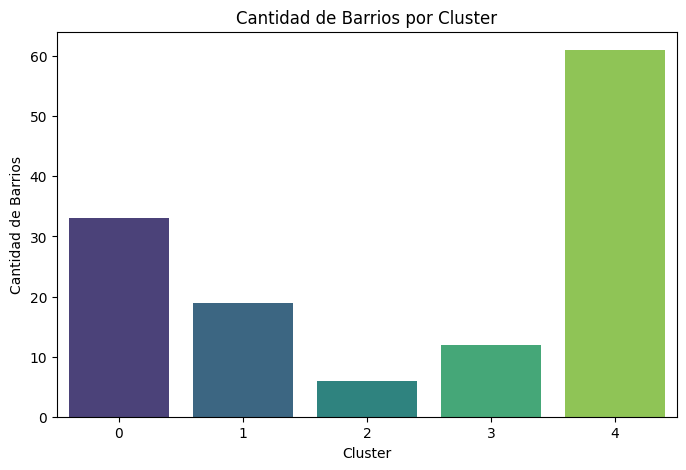

In [42]:
# Crear gráfico de barras de la cantidad de barrios por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x=ranking_barrios_df["Cluster Dominante"], y=ranking_barrios_df["Cantidad de Barrios"], palette="viridis")

# Etiquetas y título
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Barrios")
plt.title("Cantidad de Barrios por Cluster")

# Mostrar el gráfico
plt.show()

In [43]:
# Valores promedio para cada variable numérica en cada Cluster
cluster_means = df_numeric.groupby('cluster').mean()
print(cluster_means)

         m2_constr  cod_distrito  cod_barrio  letra_ce  estado  amueblado  \
cluster                                                                     
0           107.02          5.66       59.26      0.43    1.32       0.07   
1           308.48          8.73       90.59      1.10    1.41       0.06   
2           117.22          1.00       16.10      0.57    1.10       0.18   
3           167.50          4.86       51.79      0.68    1.43       0.16   
4            84.72         14.07      144.10      0.62    1.56       0.04   

         planta  dormitorios  banos  balcon  terraza  trastero  ascensor  \
cluster                                                                    
0          2.79         2.58   1.80    0.04     0.14      0.11      0.97   
1          2.17         4.12   3.29    0.10     0.40      0.27      0.97   
2          2.41         2.55   2.09    0.14     0.13      0.08      0.93   
3          2.97         2.97   2.62    0.12     0.19      0.12      0.99   
4   

In [44]:
# Estadísticas de las variables por cluster
for cluster in sorted(df_final['cluster'].unique()):
    print(f"\nCluster {cluster} Characteristics:")
    cluster_data = df_final[df_final['cluster'] == cluster]
    
    # Number of samples in cluster
    print(f"Number of samples: {len(cluster_data)}")
    
    # Numeric variables summary
    numeric_cols = cluster_data.select_dtypes(include=[np.number]).columns
    print("\nNumeric Variables Summary:")
    print(cluster_data[numeric_cols].describe())
    
    # Categorical variables summary (if any)
    cat_cols = cluster_data.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        print("\nCategorical Variables Most Common Values:")
        for col in cat_cols:
            print(f"\n{col}:")
            print(cluster_data[col].value_counts().head())
    
    print("-" * 70)


Cluster 0 Characteristics:
Number of samples: 1621

Numeric Variables Summary:
       m2_constr  cod_distrito  cod_barrio  letra_ce  estado  amueblado  \
count    1621.00       1621.00     1621.00   1621.00 1621.00    1621.00   
mean      107.02          5.66       59.26      0.43    1.32       0.07   
std        64.30          4.47       44.12      1.12    1.46       0.26   
min        13.00          2.00       11.00      0.00    0.00       0.00   
25%        63.00          3.00       34.00      0.00    0.00       0.00   
50%        93.00          5.00       53.00      0.00    1.00       0.00   
75%       132.00          6.00       63.00      0.00    2.00       0.00   
max       692.00         21.00      215.00      7.00    5.00       1.00   

       planta  dormitorios   banos  balcon  terraza  trastero  ascensor  \
count 1621.00      1621.00 1621.00 1621.00  1621.00   1621.00   1621.00   
mean     2.79         2.58    1.80    0.04     0.14      0.11      0.97   
std      1.96      

In [45]:
cluster_stats_viv_nuevas_transacciones = df_final.groupby('cluster')['viv_nuevas_transacciones'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del viv_nuevas_transacciones por cluster:\n")
print(cluster_stats_viv_nuevas_transacciones)


Estadísticas del viv_nuevas_transacciones por cluster:

         mean  median    std  min     max
cluster                                  
0       25.39   12.00  64.32 0.00  399.00
1       32.19    9.00  58.96 0.00  506.00
2       15.85    9.00  17.20 0.00  399.00
3       13.15    4.00  18.61 0.00   71.00
4       85.94   39.00 154.40 0.00 1068.00


In [46]:
cluster_stats_total_transacciones = df_final.groupby('cluster')['total_transacciones'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del total_transacciones por cluster:\n")
print(cluster_stats_total_transacciones)


Estadísticas del total_transacciones por cluster:

          mean  median    std    min     max
cluster                                     
0       248.91  257.00 122.45   5.00  693.00
1       194.51  184.00 145.20  13.00  774.00
2       387.72  323.00 232.37   5.00  774.00
3       318.13  257.00 114.29 180.00  613.00
4       394.49  396.00 220.47   7.00 1085.00


In [47]:
cluster_stats_euro_m2_barrio = df_final.groupby('cluster')["euro_m2_barrio"].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del euro_m2_barrio por cluster:\n")
print(cluster_stats_euro_m2_barrio)


Estadísticas del euro_m2_barrio por cluster:

           mean   median     std     min      max
cluster                                          
0       6238.08  5437.01 2469.81 2769.09 12463.88
1       5251.46  4638.98 1553.93 2604.91 12463.88
2       6927.99  6801.23 1030.34 2170.47 10544.30
3       9512.96 10005.31 2048.31 5605.39 11892.91
4       2982.12  2795.07  673.92 1690.80  8306.15


In [48]:
cluster_stats_precio = df_final.groupby('cluster')['target'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas del precio por cluster:\n")
print(cluster_stats_precio)


Estadísticas del precio por cluster:

              mean    median        std  min         max
cluster                                                 
0        559751.46 360000.00  771829.82 0.00  7500000.00
1       1284660.38 850000.00 1437693.74 0.00 12500000.00
2        668208.45 480000.00  868456.08 0.00 13900000.00
3       1313512.94 990000.00 1464133.75 0.00 19950000.00
4        205415.35 184000.00  179820.71 0.00  1950000.00


In [49]:
cluster_stats_m2_constr = df_final.groupby('cluster')['m2_constr'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de metros cuadrados construidos por cluster:\n")
print(cluster_stats_m2_constr)


Estadísticas de metros cuadrados construidos por cluster:

          mean  median    std   min     max
cluster                                    
0       107.02   93.00  64.30 13.00  692.00
1       308.48  218.00 329.77 24.00 4574.00
2       117.22  101.00  83.85 10.00  944.00
3       167.50  137.00 114.16 17.00 1200.00
4        84.72   75.00  41.64 18.00  500.00


In [50]:
cluster_stats_renta = df_final.groupby('cluster')['renta_bruta_media_por_persona'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de renta bruta media por persona por cluster:\n")
print(cluster_stats_renta)


Estadísticas de renta bruta media por persona por cluster:

            mean   median     std      min      max
cluster                                            
0       29966.55 27431.00 7564.90 13481.00 42678.00
1       34287.36 36592.00 6462.43 15239.00 42678.00
2       27048.24 27030.00  534.06 27030.00 42678.00
3       38230.61 38751.00  821.62 36934.00 38751.00
4       17766.49 17267.00 4725.50 13354.00 36592.00


In [51]:
cluster_stats_habitaciones = df_final.groupby('cluster')['habitaciones'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de habitaciones por cluster:\n")
print(cluster_stats_habitaciones)


Estadísticas de habitaciones por cluster:

         mean  median  std  min   max
cluster                              
0        4.38    4.00 1.75 1.00 11.00
1        7.41    7.00 3.42 1.00 22.00
2        4.63    4.00 2.28 1.00 20.00
3        5.59    5.00 2.29 1.00 24.00
4        3.89    4.00 1.31 1.00 13.00


In [52]:
cluster_stats_banos = df_final.groupby('cluster')['banos'].agg([
    'mean',
    'median',
    'std',
    'min',
    'max'
])
print("\nEstadísticas de baños por cluster:\n")
print(cluster_stats_banos)


Estadísticas de baños por cluster:

         mean  median  std  min   max
cluster                              
0        1.80    2.00 0.89 1.00  6.00
1        3.29    3.00 1.80 1.00 13.00
2        2.09    2.00 1.15 1.00 10.00
3        2.62    2.00 1.27 1.00 12.00
4        1.40    1.00 0.59 1.00  7.00


In [53]:
# Porcentaje de comparación
def cluster_profile(df, cluster_col='cluster'):
    profile = pd.DataFrame()
    
    # Calcular promedio global
    promedio_global = df_numeric.mean(numeric_only=True)
    
    for cluster in sorted(df_numeric[cluster_col].unique()):
        cluster_data = df_numeric[df_numeric[cluster_col] == cluster]
        cluster_mean = cluster_data.mean(numeric_only=True)
        
        # Calculate percentage difference from overall mean
        pct_diff = ((cluster_mean - promedio_global) / promedio_global * 100)
        profile[f'Cluster {cluster}'] = pct_diff
    
    return profile

profile = cluster_profile(df_final)
print("\nPorcentaje de diferencia de promedio global:\n")
print(profile)


Porcentaje de diferencia de promedio global:

                               Cluster 0  Cluster 1  Cluster 2  Cluster 3  \
m2_constr                         -22.87     122.33     -15.52      20.72   
cod_distrito                      -27.60      11.63     -87.15     -37.87   
cod_barrio                        -27.64      10.63     -80.34     -36.76   
letra_ce                          -33.80      69.10     -12.78       3.72   
estado                             -5.01       1.15     -20.85       2.30   
amueblado                         -25.34     -42.91      88.50      62.35   
planta                              8.20     -15.91      -6.60      15.07   
dormitorios                        -8.28      46.17      -9.51       5.57   
banos                             -13.08      58.92       0.57      26.30   
balcon                            -47.74      21.93      65.03      48.29   
terraza                           -24.07     110.67     -31.03       1.36   
trastero                     

In [54]:
# Comprehensive cluster comparison
for cluster in sorted(df_final['cluster'].unique()):
    cluster_data = df_final[df_final['cluster'] == cluster]
    
    print(f"\n=== Cluster {cluster} Profile ===")
    print(f"Size: {len(cluster_data)} samples ({len(cluster_data)/len(df_final)*100:.1f}% of total)")
    
    # Numeric variables summary
    print("\nKey Metrics:")
    numeric_cols = cluster_data.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'cluster']  # exclude cluster column
    
    cluster_stats = cluster_data[numeric_cols].agg(['mean', 'min', 'max']).round(2)
    
    for col in numeric_cols:
        print(f"{col}:")
        print(f"  Mean: {cluster_stats.loc['mean', col]:.2f}")
        print(f"  Min:  {cluster_stats.loc['min', col]:.2f}")
        print(f"  Max:  {cluster_stats.loc['max', col]:.2f}")
        
    print("-" * 50)



=== Cluster 0 Profile ===
Size: 1621 samples (16.4% of total)

Key Metrics:
m2_constr:
  Mean: 107.02
  Min:  13.00
  Max:  692.00
cod_distrito:
  Mean: 5.66
  Min:  2.00
  Max:  21.00
cod_barrio:
  Mean: 59.26
  Min:  11.00
  Max:  215.00
letra_ce:
  Mean: 0.43
  Min:  0.00
  Max:  7.00
estado:
  Mean: 1.32
  Min:  0.00
  Max:  5.00
amueblado:
  Mean: 0.07
  Min:  0.00
  Max:  1.00
planta:
  Mean: 2.79
  Min:  -1.00
  Max:  16.00
dormitorios:
  Mean: 2.58
  Min:  0.00
  Max:  8.00
banos:
  Mean: 1.80
  Min:  1.00
  Max:  6.00
balcon:
  Mean: 0.04
  Min:  0.00
  Max:  1.00
terraza:
  Mean: 0.14
  Min:  0.00
  Max:  1.00
trastero:
  Mean: 0.11
  Min:  0.00
  Max:  1.00
ascensor:
  Mean: 0.97
  Min:  0.00
  Max:  1.00
jardin:
  Mean: 0.03
  Min:  0.00
  Max:  2.00
cancha_tenis:
  Mean: 0.00
  Min:  0.00
  Max:  0.00
chimenea:
  Mean: 0.00
  Min:  0.00
  Max:  1.00
exterior:
  Mean: 1.26
  Min:  1.00
  Max:  2.00
piscina:
  Mean: 0.01
  Min:  0.00
  Max:  2.00
porton_electrico:
  Mean: 0

In [55]:
# Even more detailed cluster comparison
for cluster in sorted(df_final['cluster'].unique()):
    cluster_data = df_final[df_final['cluster'] == cluster]
    
    print(f"\n=== Cluster {cluster} Profile ===")
    print(f"Size: {len(cluster_data)} samples ({len(cluster_data)/len(df_final)*100:.1f}% of total)")
    
    # Numeric variables summary
    print("\nKey Metrics:")
    numeric_cols = cluster_data.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'cluster']
    
    cluster_stats = cluster_data[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max']).round(2)
    
    for col in numeric_cols:
        print(f"\n{col}:")
        print(f"  Mean:   {cluster_stats.loc['mean', col]:.2f}")
        print(f"  Median: {cluster_stats.loc['median', col]:.2f}")
        print(f"  Std:    {cluster_stats.loc['std', col]:.2f}")
        print(f"  Min:    {cluster_stats.loc['min', col]:.2f}")
        print(f"  Max:    {cluster_stats.loc['max', col]:.2f}")
        
    print("-" * 50)



=== Cluster 0 Profile ===
Size: 1621 samples (16.4% of total)

Key Metrics:

m2_constr:
  Mean:   107.02
  Median: 93.00
  Std:    64.30
  Min:    13.00
  Max:    692.00

cod_distrito:
  Mean:   5.66
  Median: 5.00
  Std:    4.47
  Min:    2.00
  Max:    21.00

cod_barrio:
  Mean:   59.26
  Median: 53.00
  Std:    44.12
  Min:    11.00
  Max:    215.00

letra_ce:
  Mean:   0.43
  Median: 0.00
  Std:    1.12
  Min:    0.00
  Max:    7.00

estado:
  Mean:   1.32
  Median: 1.00
  Std:    1.46
  Min:    0.00
  Max:    5.00

amueblado:
  Mean:   0.07
  Median: 0.00
  Std:    0.26
  Min:    0.00
  Max:    1.00

planta:
  Mean:   2.79
  Median: 2.00
  Std:    1.96
  Min:    -1.00
  Max:    16.00

dormitorios:
  Mean:   2.58
  Median: 3.00
  Std:    1.12
  Min:    0.00
  Max:    8.00

banos:
  Mean:   1.80
  Median: 2.00
  Std:    0.89
  Min:    1.00
  Max:    6.00

balcon:
  Mean:   0.04
  Median: 0.00
  Std:    0.20
  Min:    0.00
  Max:    1.00

terraza:
  Mean:   0.14
  Median: 0.00
  Std

## *5.2. K-Means*

In [56]:
def plot_clusters(**kwargs):
    fig = px.scatter(**kwargs)
    fig.update_traces(
        marker=dict(size=12, line=dict(width=2, color="DarkSlateGrey")),
        selector=dict(mode="markers"),
    )
    fig.show()

In [57]:
plot_clusters(
    data_frame=df,
    x="m2_constr",
    y="target",
    title="Distribución de precio por metro cuadrado construido",
    width=1200,
    height=800,
)

In [58]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init="auto")

kmeans.fit(df)

preds = kmeans.predict(df)

cluster_labels = [f"Cluster {p}" for p in preds]
color_map = {"Cluster 0": "red", "Cluster 1": "green", "Cluster 2": "blue", "Cluster 3": "orange", "Cluster 4": "yellow"}

plot_clusters(
    data_frame=df,
    x="m2_constr",
    y="target",
    color=cluster_labels,
    title="Distribución de precio por metro cuadrado construido (con clusters)",
    width=1200,
    height=800,
    color_discrete_map=color_map,
)

In [59]:
df_centers = pd.DataFrame(
    data=kmeans.cluster_centers_,
    columns=df.columns,
)

plot_clusters(
    data_frame=df_centers,
    x="m2_constr",
    y="target",
    color_discrete_map=color_map, 
    title="Cluster centers",
    width=1200,
    height=800,
    color=[f"Cluster {i}" for i in df_centers.index],
)

## *5.3. PCA*

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.values
# scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2', 'pca_3', 'pca_4'])

fig = px.scatter(df_pca, x="pca_1", y='pca_4')
fig.show()

In [61]:
# Visualización de la varianza explicada por cada componente
variance_explained = np.round(pca.explained_variance_ratio_ * 100, 2)
print(f"Variance explained by each component: {variance_explained}")
print("Varianza total explicada por los 4 componentes:", sum(pca.explained_variance_ratio_))

Variance explained by each component: [17.32  8.38  6.59  5.37]
Varianza total explicada por los 4 componentes: 0.3766357293923292


In [62]:
# Cargar las cargas (coeficientes) de los componentes principales
pca_components = pca.components_

# Crear un DataFrame para visualizar las cargas por cada componente
df_pca_components = pd.DataFrame(pca_components, columns=df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Mostrar las primeras 5 filas de las cargas
print(df_pca_components.head())

     m2_constr  distrito  cod_distrito  barrio  cod_barrio  letra_ce  \
PC1       0.07     -0.05         -0.21   -0.01       -0.21      0.00   
PC2       0.27      0.09          0.09   -0.09        0.08      0.08   
PC3      -0.12      0.28          0.19   -0.05        0.19      0.03   
PC4      -0.07     -0.08         -0.02    0.05       -0.02      0.44   

     tipologia  estado  amueblado  planta  dormitorios  banos  balcon  \
PC1       0.00   -0.02       0.06    0.02         0.04   0.11    0.04   
PC2      -0.15    0.04       0.01   -0.01         0.24   0.25    0.04   
PC3       0.07    0.07      -0.01    0.05        -0.09  -0.10   -0.01   
PC4       0.04    0.04       0.12    0.01        -0.07  -0.05    0.16   

     terraza  trastero  ascensor  antiguedad  jardin  tipo_inmueble  \
PC1     0.01     -0.01      0.02        0.04   -0.02           0.06   
PC2     0.16      0.13      0.02       -0.05    0.15           0.07   
PC3    -0.00      0.01      0.03        0.01   -0.05        

In [63]:
pca_components = pca.components_  # Cargas de los componentes
explained_variance_ratio = pca.explained_variance_ratio_  # Variabilidad explicada por cada componente

# Ver las cargas del primer componente (PC1)
first_component_loadings = pca_components[1]
# Crear un DataFrame con las cargas del primer componente
df_loadings = pd.DataFrame({
    'Feature': df.columns,
    'Loading': first_component_loadings
})

# Ordenar las cargas para ver cuáles son las variables más relevantes para el primer componente
df_loadings_sorted = df_loadings.sort_values(by='Loading', ascending=False)

# Mostrar las 10 variables con mayor carga
print(df_loadings_sorted.head(10))

# Ver cuál es la contribución total al primer componente (17.32%)
variance_explained_pc1 = explained_variance_ratio[1] * 100  # % de la variabilidad explicada por el primer componente
print(f"El primer componente explica el {variance_explained_pc1}% de la variabilidad total.")

               Feature  Loading
68          atrib_lujo     0.29
0            m2_constr     0.27
66        habitaciones     0.27
11               banos     0.25
10         dormitorios     0.24
59         num_garajes     0.20
61              target     0.19
63  pm_tlogia_distrito     0.17
67          m2_por_hab     0.16
13             terraza     0.16
El primer componente explica el 8.37887213488898% de la variabilidad total.


In [61]:
fig = px.bar(
    x=range(len(variance_explained)),
    y=variance_explained / 100,
    text=np.round(variance_explained / 100, 4),
    title="Variance explained by each principal component",
    labels={"x": "Principal Component", "y": "Variance Explained"},
)
fig.update_yaxes(tickformat=".0%")
fig.update_traces(texttemplate="%{text:.2%}")
fig.show()

In [62]:
fig = px.area(
    x=range(len(variance_explained)),
    y=variance_explained.cumsum() / 100,
    title="Variance explained by each principal component",
    labels={"x": "Principal Component", "y": "Variance Explained"},
)
fig.update_yaxes(tickformat=".0%")
fig.update_traces(texttemplate="%{text:.2%}")
fig.show()

### 5.3.1 **_Conclusion_**


Se han detectado 4 componentes que en suma dan el 37 % de la variabilidad total de la informacion. Podemos utilizar las variables que aportan la mayor variabilidad de informacion como las que se encuentran en el componente 1; las cuales estan conformadas 

- 68          atrib_lujo     0.29
- 0            m2_constr     0.27
- 66        habitaciones     0.27
- 11               banos     0.25
- 10         dormitorios     0.24
- 59         num_garajes     0.20
- 61              target     0.19
- 63  pm_tlogia_distrito     0.17
- 67          m2_por_hab     0.16
- 13             terraza     0.16 

Y que nos van a servir para mejorar la seleccion de variables, lo que nos puede ayudar en ciertos puntos tanto en clustering como en regresion, por ejemplo: reducir la dimensionadad que a su vez nos puede ayudar a mejorar el rendimiento y la interpretabilidad del clustering, así como:

Clustering: 
- Menos ruido y redundancia. 
- Mejorar rendimiento. 
- Intrepretabilidad.
- Aceleración del cálculo: Menos dimensiones significa menos distancia que calcular entre puntos, lo que hace que el algoritmo sea más rápido.

Regresion: 
- Eliminacion de multicolinealidad. 
- Mejor rendimient y menos sobreajuste...


Por supuesto que primero se tiene que probar para ver que tanto realmente ayuda y si genera un beneficio alguno a lo que ya se ha obtenido.
Asi mismo, con lo que se obtuvo del 37% , no se representa el total del 100% por lo tanto, aun hay un margern considerabe de varianza de datos ahi que lo explican otras variables o que hay algo que se nos ha pasado por alto y no vimos. 

Al tiempo que tenemos ahora para la entrega del proyecto, creo que solo lograremos hacer el metodo pero no aplicarlo, aun asi el hecho de haberlo intentado se encuentra ahi . 

## *5.4. hDBSCAN (Density-Based Spatial Clustering of Applications with Noise)*
- Útil cuando hay clusters de forma irregular o con ruido.
- No requiere definir el número de clusters, pero es sensible a los parámetros eps y min_samples.

In [125]:
# Seleccionar las columnas que nos interesan
df_cluster = df[['m2_constr', 'habitaciones', 'precio_mean_b', 'estado']]

# Normalizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Crear el DataFrame con las componentes principales
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Ajustar HDBSCAN
hdb = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=5, cluster_selection_method='leaf')
df_pca['cluster'] = hdb.fit_predict(df_pca)

# Crear el mapa de colores para los clusters
colors = px.colors.sample_colorscale(samplepoints=df_pca['cluster'].nunique(), colorscale='rainbow')
color_map = {i: colors[i] for i in range(len(set(df_pca['cluster'])))} 
color_map[-1] = 'lightgray'  # Outliers

# Visualizar los clusters en 2D
fig = px.scatter(
    df_pca, 
    x='PCA1', 
    y='PCA2', 
    color=df_pca['cluster'].apply(lambda x: f"Cluster {x}" if x != -1 else "Outlier"),
    color_discrete_map=color_map,
    title='Clustering de Viviendas con HDBSCAN',
    labels={'cluster': 'Cluster'},
)
fig.show()

c:\Users\Lenovo\anaconda3\envs\nuclio_mlops\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\Lenovo\anaconda3\envs\nuclio_mlops\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [126]:
# Añadir las características originales al DataFrame de PCA
df_pca['m2_constr'] = df['m2_constr']
df_pca['habitaciones'] = df['habitaciones']
df_pca['precio_mean_b'] = df['precio_mean_b']
df_pca['estado'] = df['estado']

# Agrupar por el cluster y calcular la media de las características
cluster_means = df_pca.groupby('cluster')[['m2_constr', 'habitaciones', 'precio_mean_b', 'estado']].mean()
print(cluster_means)

         m2_constr  habitaciones  precio_mean_b  estado
cluster                                                
-1            0.78          0.83           0.82   -0.84
 0            0.01         -0.02           0.11    2.36
 1           -0.09         -0.03           0.20    1.71
 2           -0.36         -0.44          -0.53    1.05
 3           -0.05         -0.01           0.05    0.40
 4           -0.15         -0.07          -0.10   -0.26
 5           -0.13          0.02          -0.13   -0.91
 6           -0.45         -0.65          -0.72   -0.91


### 5.4.1 **_Conclusión HDBSCAN_**

**_Cluster -1: Outliers_**

Características: Este grupo representa propiedades con características atípicas, con una superficie (m2_constr) y un número de habitaciones relativamente grandes. El precio_mean_b es alto y el estado de las propiedades es bajo.

Oportunidades de Inversión: Aunque este cluster representa valores atípicos, podría tratarse de propiedades que no se ajustan a las características estándar del mercado. Las oportunidades aquí pueden ser únicas, pero requieren un análisis más profundo para determinar si su valor real puede mejorar con ciertas modificaciones o estrategias de renovación.

**_Cluster 0: Propiedades con precios medios y buen estado_**

Características: Este cluster incluye propiedades con una superficie moderada, un número de habitaciones equilibrado, y un precio medio algo elevado. El estado es muy bueno, lo que indica propiedades en excelentes condiciones.

Oportunidades de Inversión: Este grupo puede representar propiedades en áreas con alta demanda y de buena calidad. Estas propiedades son una excelente opción para aquellos interesados en propiedades listas para ocupar o alquileres a largo plazo, ya que son bienes inmuebles que no requieren mejoras.

**_Cluster 1: Propiedades de precios medios y estado aceptable_**

Características: Propiedades con una superficie más pequeña y precios moderados. El estado es también aceptable, aunque no tan excelente como el del Cluster 0.

Oportunidades de Inversión: Este cluster puede estar compuesto por propiedades que necesitan algo de renovación. Representan inversiones con un costo inicial más bajo, con el potencial de valorizarse a través de reformas. Podría ser interesante para aquellos que busquen comprar y mejorar propiedades en áreas en crecimiento.

**_Cluster 2: Propiedades con precios bajos y estado medio_**
Características: Estas propiedades son más pequeñas en términos de superficie y cuentan con un precio bajo. El estado de las propiedades es regular.

Oportunidades de Inversión: 
Estas propiedades pueden ser aprovechadas con un modelo de renovación económica, asignando precios bajos iniciales para atraer compradores a largo plazo. Es crucial realizar un ajuste adecuado de precios en función de la zona y el potencial de revalorización.


**_Cluster 3: Propiedades con precios medios y estado aceptable_**
Características: Las propiedades en este cluster tienen una superficie moderada y un precio algo bajo. El estado de las propiedades es aceptable.

Oportunidades de Inversión: Al igual que el Cluster 1, este grupo representa propiedades que podrían necesitar algunas mejoras, pero con una buena relación precio/calidad. Estas propiedades son buenas para aquellos que busquen mejorar el valor a través de reformas.

**_Cluster 4: Propiedades de precio bajo con estado regular_**

Características: Este cluster tiene propiedades con precios bajos y condiciones intermedias. La superficie también es pequeña.

Oportunidades de Inversión: Este grupo podría ser adecuado para aquellos interesados en propiedades de bajo costo en áreas con un bajo nivel de demanda actual. Sin embargo, dado que el estado no es excelente, sería necesario considerar las inversiones necesarias para mejorar estas propiedades y hacerlas atractivas para inquilinos o compradores.

**_Cluster 5: Propiedades de bajo costo y condiciones bajas_**

Características: Las propiedades en este cluster tienen una superficie pequeña y un precio bajo. El estado también es bajo, lo que sugiere que necesitan importantes mejoras.

Oportunidades de Inversión: Este cluster podría estar compuesto por propiedades que requieren renovaciones profundas. Pueden ofrecer una excelente oportunidad para aquellos que busquen proyectos de rehabilitación en áreas menos demandadas o con un potencial de crecimiento futuro.

**_Cluster 6: Propiedades con características bajas y precios bajos._**

Características: Este grupo incluye propiedades con precios muy bajos, superficies pequeñas y un estado también bajo.

Oportunidades de Inversión: Este cluster representa propiedades con un bajo valor de mercado y condiciones que pueden ser mejoradas. Estas propiedades pueden ser una opción para aquellos interesados en adquirir propiedades a precios extremadamente bajos y renovarlas para ponerlas a la venta o alquiler a futuro. Sin embargo, debido a su bajo estado, es probable que se requiera una mayor inversión en renovaciones.



## *5.5. Comparación de métodos*